# Land Shark Inc. - Monte Carlo Simulation
Land Shark Inc., a real estate company, purchases properties that it develops and then resells.

In the past, Land Shark has successfully acquired properties via first-price sealedbid auctions involving commercial and residential properties. 

In such auctions, each bidder submits a single concealed bid. The submitted bids are then compared, and the party with the highest bid wins the property and pays the bid amount. In case of a tie (a rare occurrence), a coin flip decides the winner.

Land Shark has been reviewing upcoming property auctions and has identified a
commercial property of interest. Land Shark estimates the value of this property to be \\$1,389,000.

Land Shark is considering a bid of \\$1,229,000 and would like to evaluate its chances of winning the upcoming
auction with this bid.

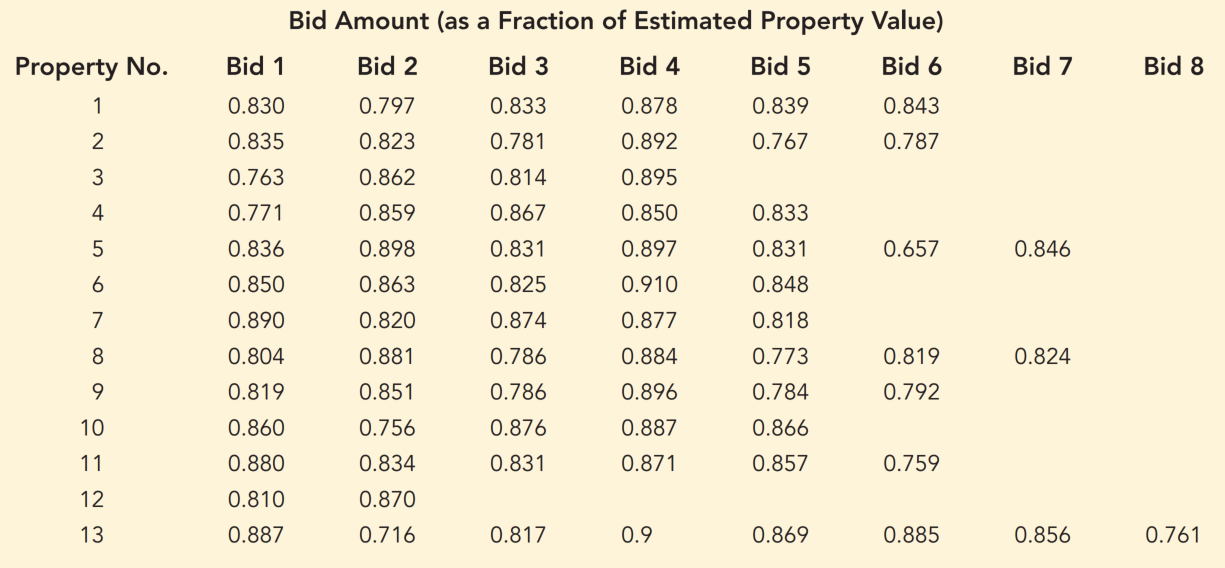

## Preparing the Model
1. Identify the input parameters and output measures.
2. Develop a python model that correctly computes the values of the output measures given static values of the input parameters
3. Prepare the python model for simulation analysis by replacing the static values of the input parameters that Land Shark does not know with certainty with probability distributions of possible values

### Input and Output Parameters
#### Input
The relevant input parameters for the upcoming auction are:
1. The estimated value of the property,
2. The number of bidders competing against Land Shark,
3. The bid amounts submitted by the competitors,and
4. Land Shark’s bid amount.

##### Land Shark is Sure of:
1. Its estimate that the property is worth \\$1,389,000. Furthermore,
2. Its bid amount and it would like to evaluate a bid amount of \\$1,229,000.

In [12]:
estimated_value = 1389000
land_shark_bid_amount = 1229000

##### Land Shart is Unsure About:
1. The number of competing bidders and
2. The bid amounts submitted by these competitors.

In [13]:
competitors_bids = [0.887, 0.716, 0.818, 0.9, 0.869, 0.885, 0.856, 0.761]

def numberOfBidders():
    return 4 # for now

def bidFractionOf(bidder_number):
    return competitors_bids[bidder_number - 1]
    
def bidAmount(bidder_number):
    return estimated_value * bidFractionOf(bidder_number)

#### Output
The output measures in which we are interested are whether Land Shark wins the simulated auction given its specified amount and Land Shark’s net return.

- If Land Shark wins the auction, its return is computed as the difference between the estimated value of the property and its bid amount.
- If Land Shark does not win the auction, its return is \\$0.

In [14]:
import random
def getLargestBid():
    largest_bid = bidAmount(1) # assume the first bid is the largest bid
    for i in range(1, numberOfBidders() + 1):
        if largest_bid < bidAmount(i):
            largest_bid = bidAmount(i) # record the largest bid
    return largest_bid

def didWeWin(largest_bid):
    if largest_bid > land_shark_bid_amount:
        return False
    return True

def computeReturn():
    if didWeWin(getLargestBid()):
        return estimated_value - land_shark_bid_amount
    return 0

### Consider Static Values for the Input Parameters
1. the number of competitor bids ranges from two to eight.

#### Example
Suppose those eight competitor bid amounts (as a percentage of the property’s estimated value) are 0.887, 0.716, 0.817, 0.900, 0.869, 0.885, 0.856, and 0.761.

If only four competitors decide to submit bids in the auction. Then we only want to consider four of the eight bid amounts. We can just select the first four bid amounts and ignore the last four. In this case, the four competing bid amounts (expressed in dollars) are:
- (0.887)(\\$1,389,000) = \\$1,232,043;
- (0.716)(\\$1,389,000) = \\$994,524;
- (0.817)(\\$1,389,000) = \\$1,134,813; and
- (0.900)(\\$1,389,000) = \\$1,250,100. 

We compare Land Shark’s bid (\\$1,229,000) to the largest competing bid (\\$1,250,100) and observe that in this scenario, Land Shark does not win the auction, so its return is \\$0.

##### Note
In general, the number of competitor bids is uncertain and varies from two to eight. Therefore, we need to devise a model that will correctly compute the largest competing bid amount from among a varying number of bids.

In [15]:
print 'Largest Competitor Bid: ${:,.2f}'.format(getLargestBid())
print 'Did we win? ', didWeWin(getLargestBid())
print 'Return: ${:,.2f}'.format(computeReturn())

Largest Competitor Bid: $1,250,100.00
Did we win?  False
Return: $0.00


## Generating Values for Number of Bidders
The figure below, prepared by Land Shark Inc., suggests that the relative likelihood of different values for the number of bidders appears to be equal. 

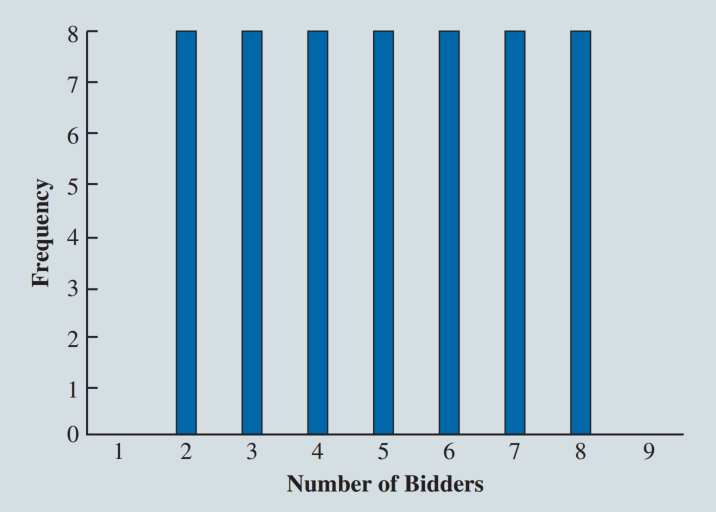
<center>Frequency Distribution of Number of Bidders in 56 PRevious Auctions</center>

Thus, we decide to model the number of bidders to be 2, 3, 4, 5, 6, 7, or 8 with equal probability.

In [16]:
def numberOfBidders():
    return random.randrange(2, 9)

## Generating Values for Competitors Bids
From the past 56 auctions, there has been a total of 280 observations of how competitors have bid (as a fraction of the respective property’s estimated value).

In [17]:
bid_valu_history = [ 0.8003 , 0.8767 , 0.6221 , 0.9045 , 0.9058 , 0.6949 , 0.7076 , 0.8264 ,\
                    0.6369 , 0.9145 , 0.7698 , 0.6234 , 0.8352 , 0.8879 , 0.6799 , 0.7152 ,\
                    0.6884 , 0.8826 , 0.8023 , 0.8199 , 0.8642 , 0.7807 , 0.6377 , 0.7028 ,\
                    0.7300 , 0.7877 , 0.6583 , 0.8705 , 0.7268 , 0.9119 , 0.8927 , 0.7631 ,\
                    0.8883 , 0.7284 , 0.8567 , 0.8529 , 0.7298 , 0.8218 , 0.6299 , 0.6564 ,\
                    0.8435 , 0.7019 , 0.8961 , 0.7754 , 0.9054 , 0.8086 , 0.7667 , 0.9017 ,\
                    0.6698 , 0.7978 , 0.8112 , 0.6078 , 0.6599 , 0.8635 , 0.6194 , 0.7185 ,\
                    0.7242 , 0.6171 , 0.6555 , 0.6078 , 0.8285 , 0.7623 , 0.6881 , 0.8898 ,\
                    0.8623 , 0.8769 , 0.8022 , 0.6898 , 0.6485 , 0.6453 , 0.7967 , 0.7055 ,\
                    0.6999 , 0.7965 , 0.9130 , 0.6729 , 0.6778 , 0.7438 , 0.8087 , 0.8067 ,\
                    0.7753 , 0.6615 , 0.7922 , 0.6943 , 0.8041 , 0.7369 , 0.8328 , 0.8577 ,\
                    0.8984 , 0.6046 , 0.6721 , 0.7534 , 0.9027 , 0.7793 , 0.6403 , 0.6001 ,\
                    0.8055 , 0.7098 , 0.6269 , 0.8452 , 0.6780 , 0.8294 , 0.8219 , 0.6295 ,\
                    0.8078 , 0.7710 , 0.6061 , 0.8801 , 0.8340 , 0.6339 , 0.8987 , 0.8912 ,\
                    0.8110 , 0.7043 , 0.8398 , 0.6865 , 0.8857 , 0.7669 , 0.9193 , 0.7158 ,\
                    0.7689 , 0.8777 , 0.7824 , 0.6225 , 0.6082 , 0.9076 , 0.7664 , 0.7591 ,\
                    0.6339 , 0.8156 , 0.6969 , 0.8739 , 0.8516 , 0.8304 , 0.6031 , 0.7633 ,\
                    0.6154 , 0.6558 , 0.7721 , 0.9060 , 0.7472 , 0.6494 , 0.8087 , 0.6668 ,\
                    0.7184 , 0.8704 , 0.8057 , 0.6150 , 0.7013 , 0.7824 , 0.8327 , 0.7563 ,\
                    0.6513 , 0.8007 , 0.8307 , 0.6868 , 0.6418 , 0.6292 , 0.8659 , 0.6952 ,\
                    0.8695 , 0.6587 , 0.6355 , 0.6967 , 0.6675 , 0.7151 , 0.7165 , 0.7434 ,\
                    0.7363 , 0.6864 , 0.8658 , 0.7691 , 0.6046 , 0.7844 , 0.6439 , 0.6998 ,\
                    0.8009 , 0.8325 , 0.8925 , 0.9178 , 0.8280 , 0.9097 , 0.7078 , 0.7262 ,\
                    0.7252 , 0.9158 , 0.6394 , 0.7543 , 0.6738 , 0.6146 , 0.6710 , 0.7330 ,\
                    0.7797 , 0.6586 , 0.7788 , 0.8602 , 0.7537 , 0.8076 , 0.8417 , 0.8741 ,\
                    0.6853 , 0.6239 , 0.8269 , 0.7112 , 0.7989 , 0.8410 , 0.8478 , 0.7582 ,\
                    0.8200 , 0.8807 , 0.8518 , 0.6056 , 0.6854 , 0.7082 , 0.7866 , 0.6199 ,\
                    0.7853 , 0.6634 , 0.8747 , 0.7350 , 0.8123 , 0.8328 , 0.6321 , 0.6984 ,\
                    0.8240 , 0.8376 , 0.7363 , 0.6582 , 0.7936 , 0.6413 , 0.9009 , 0.6413 ,\
                    0.8566 , 0.6518 , 0.6124 , 0.6708 , 0.8498 , 0.8227 , 0.7199 , 0.8439 ,\
                    0.7380 , 0.7455 , 0.9115 , 0.6355 , 0.6581 , 0.7911 , 0.8992 , 0.8515 ,\
                    0.8864 , 0.9090 , 0.8608 , 0.6202 , 0.8470 , 0.7505 , 0.8663 , 0.9184 ,\
                    0.8953 , 0.7251 , 0.7282 , 0.8527 , 0.8200 , 0.8565 , 0.6281 , 0.8327 ,\
                    0.7593 , 0.7664 , 0.6674 , 0.8408 , 0.7627 , 0.6724 , 0.9022 , 0.8966 ,\
                    0.6850 , 0.6232 , 0.7106 , 0.7872 , 0.6549 , 0.8299 , 0.6649 , 0.8242 ]

In [18]:
#bid_valu_history = np.random.uniform(0.7, 0.95, 280)

### Method 1: Directly Sampling from Historical Data
When sampling values directly from sample data, we note that only values that exist in the data will be possible values for a simulation trial. Resampling empirical data is a good approach only when the data adequately represent the range of possible values and the distribution of values across this range. 

#### Executing the Simulation Trials
Each trial in the simulation of the auction involves
1. Randomly generating values for the number of bidders and
2. Randomly generating the values of the eight possible bid fractions and then
3. Computing whether Land Shark wins the auction and its return from the auction.

In [21]:
import random

# Rewrite helper functions
def getLargestBid(bidsList):
    largest_bid = bidsList[0] # assume the first bid is the largest bid
    for i in range(0, len(bidsList)):
        if largest_bid < bidsList[i]:
            largest_bid = bidsList[i] # record the largest bid
    return largest_bid

def didWeWin(bidsList):
    if (getLargestBid(bidsList)*estimated_value) > land_shark_bid_amount:
        return False
    return True

def computeReturn(bidsList):
    if didWeWin(bidsList):
        return estimated_value - land_shark_bid_amount
    return 0

# Step 1: Randomly generating values for the number of bidders
def numberOfBidders():
    return random.randint(2,8)

# Step 2: Randomly generating the values of the eight possible bid fractions
def generateEightPossibleBids():
    global competitors_bids
    competitors_bids = []
    for i in range(0,8):
        competitors_bids.append(bid_valu_history[random.randint(0, len(bid_valu_history) - 1)])
    return competitors_bids

# Step 3: Computing whether Land Shark wins the auction and its return from the auction
sim = []

for x in range(1, 1000):
    trial = []
    trial.append(x) # serial number
    num = numberOfBidders() # Generate number of bidders
    trial.append(num) # save it
    genBids = generateEightPossibleBids() # generate 8 random competetiors bids
    theBids = []
    for i in range(0, 8):
        if (i < num):
            theBids.append(genBids[i])
        else:
            theBids.append(0)
    for i in range(0, len(theBids)):
        trial.append(theBids[i])
    largestBid = getLargestBid(theBids)
    trial.append(didWeWin(theBids))
    trial.append(computeReturn(theBids))
    sim.append(trial)

print sim[0]
print sim[1]
print sim[2]
print sim[3]

[1, 8, 0.8285, 0.6078, 0.6729, 0.8067, 0.6724, 0.8055, 0.8007, 0.6269, True, 160000]
[2, 2, 0.6999, 0.6581, 0, 0, 0, 0, 0, 0, True, 160000]
[3, 4, 0.8767, 0.7689, 0.7721, 0.6952, 0, 0, 0, 0, True, 160000]
[4, 4, 0.8439, 0.7455, 0.6864, 0.7689, 0, 0, 0, 0, True, 160000]


In [23]:
import numpy as np
from pandas import DataFrame as df
import pandas as pd

# pandas number formatting configuration
pd.options.display.float_format = '{:,.2f}'.format

dd = np.array(sim)
# convert our list into a dataframe
data = df(data = {'Number of Bidders': dd[:,1],
                  'Bid 1': dd[:,2],
                  'Bid 2': dd[:,3],
                  'Bid 3': dd[:,4],
                  'Bid 4': dd[:,5],
                  'Bid 5': dd[:,6],
                  'Bid 6': dd[:,7],
                  'Bid 7': dd[:,8],
                  'Bid 8': dd[:,9],
                  'Win': dd[:,10],
                  'Return': dd[:,11]
                 })
data.head(10)

,Bid 1,Bid 2,Bid 3,Bid 4,Bid 5,Bid 6,Bid 7,Bid 8,Number of Bidders,Return,Win
0,0.83,0.61,0.67,0.81,0.67,0.81,0.80,0.63,8.00,"160,000.00",1.00
1,0.70,0.66,0.00,0.00,0.00,0.00,0.00,0.00,2.00,"160,000.00",1.00
2,0.88,0.77,0.77,0.70,0.00,0.00,0.00,0.00,4.00,"160,000.00",1.00
3,0.84,0.75,0.69,0.77,0.00,0.00,0.00,0.00,4.00,"160,000.00",1.00
4,0.88,0.89,0.61,0.91,0.84,0.00,0.00,0.00,5.00,0.00,0.00
5,0.82,0.69,0.79,0.89,0.72,0.79,0.00,0.00,6.00,0.00,0.00
6,0.84,0.83,0.83,0.00,0.00,0.00,0.00,0.00,3.00,"160,000.00",1.00
7,0.87,0.74,0.72,0.00,0.00,0.00,0.00,0.00,3.00,"160,000.00",1.00
8,0.62,0.63,0.00,0.00,0.00,0.00,0.00,0.00,2.00,"160,000.00",1.00
9,0.65,0.78,0.78,0.84,0.91,0.00,0.00,0.00,5.00,0.00,0.00


In [24]:
data.describe()

,Bid 1,Bid 2,Bid 3,Bid 4,Bid 5,Bid 6,Bid 7,Bid 8,Number of Bidders,Return,Win
count,999.00,999.00,999.00,999.00,999.00,999.00,999.00,999.00,999.00,999.00,999.00
mean,0.76,0.76,0.65,0.56,0.43,0.33,0.23,0.12,5.05,"89,849.85",0.56
std,0.09,0.09,0.29,0.35,0.38,0.38,0.35,0.28,2.04,"79,431.08",0.50
min,0.60,0.60,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,0.67,0.68,0.64,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00
50%,0.76,0.77,0.73,0.71,0.65,0.00,0.00,0.00,5.00,"160,000.00",1.00
75%,0.84,0.85,0.83,0.82,0.78,0.73,0.66,0.00,7.00,"160,000.00",1.00
max,0.92,0.92,0.92,0.92,0.92,0.92,0.92,0.92,8.00,"160,000.00",1.00


In [25]:
import math
min_return = data.describe()['Return']['min']
print 'Minimum Return: ${:,.2f}'.format(min_return)
max_return = data.describe()['Return']['max']
print 'Maximum Return: ${:,.2f}'.format(max_return)
mean_return = data.describe()['Return']['mean']
print 'Mean Return: ${:,.2f}'.format(mean_return)
std_return = data.describe()['Return']['std']
print 'Standard Deviation of Return: ${:,.2f}'.format(std_return)
prob_win_auction = data.describe()['Win']['mean']
print 'P(Win Auction): {:.5f}'.format(prob_win_auction)
data_count = data.describe()['Win']['count']
standard_error_of_proportion = math.sqrt(prob_win_auction*(1-prob_win_auction)/data_count)
print 'Standard Error of Proportion: {:.5f}'.format(standard_error_of_proportion)

Minimum Return: $0.00
Maximum Return: $160,000.00
Mean Return: $89,849.85
Standard Deviation of Return: $79,431.08
P(Win Auction): 0.56156
Standard Error of Proportion: 0.01570


### Homework
<p style="color:red;">Compute the:
<ul>
    <li style="color:red;">95% C.I. on Mean Return, and</li>
    <li style="color:red;">95% C.I. on P(Win Auction)</li>
</ul>
<p style="color:red;">As explained in the Sanotronics LLC example</p>
</p>

### Method 2: Fitted Distribution

The frequency distribution of 280 bid fractions in 56 previous auctions is shown in the next figure

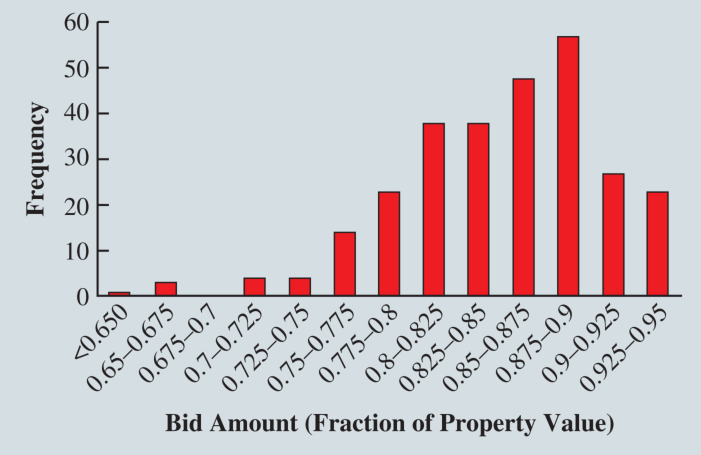

We will cover two fitted distribution methods:
- Triangular Distribution
- Beta Distribution

#### Triangular Distribution of the Observations
The triangular distribution is a unimodal distribution characterized by three input parameters: **minimum** ($a$), **mode** ($m$), and **maximum** ($b$). While the shape of the bid fraction distribution does not appear exactly triangular, it could be worthwhile option to explore.

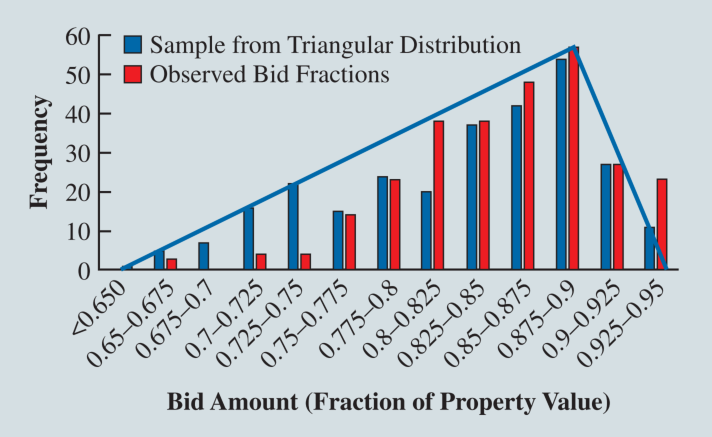

##### By looking at the data
- $a=0.645$
- $b=0.947$

To determine the **mode** ($m$), _most likely value_ of the triangle distribution we base the mode on the histogram in the above figure. We observe the most frequent bin is \[0.875, 0.90) and use the midpoint of this bin, 0.8875, as the mode of the triangular distribution.

Similar to discrete probability code we wrote for Sanotronics Inc. We the random value from triangular distribution can be computed by:

```python
rnd = random.random()
if random < (m-a)/(b-a):
   return math.sqrt((b-a)*(m-a)*rnd)
else:
   return b - math.sqrt((b-a)*(b-m)*(1-rnd))
```

#### Beta Distribution of the Observations
The beta distribution is a very flexible distribution characterized by four input parameters: alpha ($\alpha$), beta ($\beta$), minimum ($A$), and maximum ($B$).

A common method for estimating the a and b values in a beta distribution uses the sample mean ($\bar{x}$)  and sample standard deviation ($s$) 

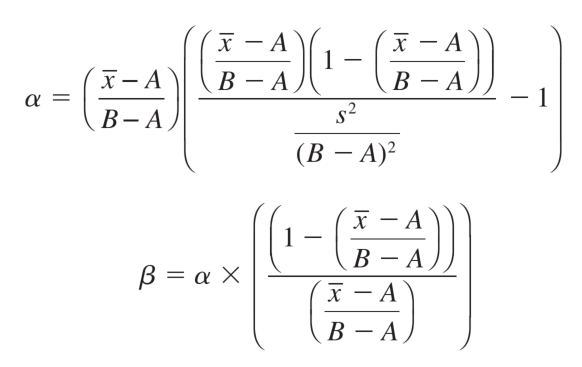


Assuming that the mean is $\bar{x}=0.851$ and the sample standard deviation is $s=0.056$, the minimum value is $0.645$, and the maximum value is $0.947$, then

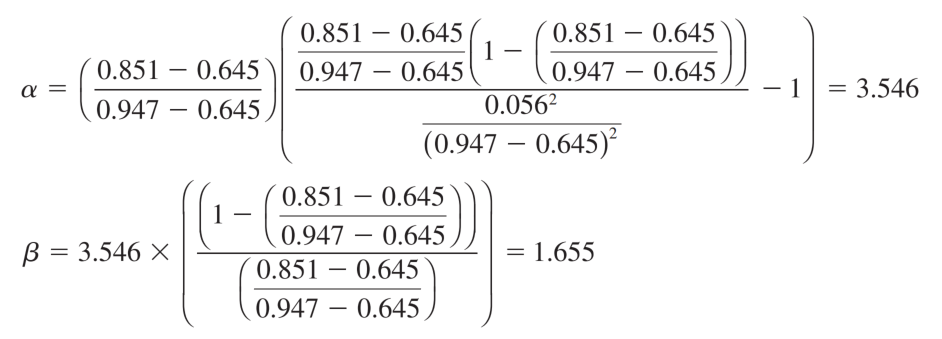

The fitted beta distribution curve is shown in the figure below

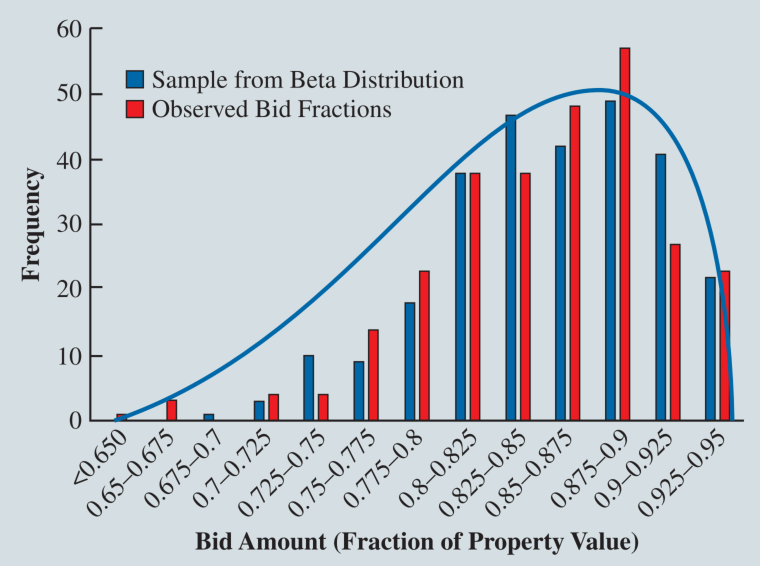

The following code can be used to in a simulation once $\alpha$ and $\beta$ are determined

```python
from scipy.stats import beta
a = 3.546
b = 1.655
beta.ppf(random.random(), a, b, loc=0.645, scale=0.947-0.645)
```

<blockquote>
While it is impossible to discern what is the “best” way to model the uncertain bid fraction values, the exercise of testing different distributions generates insight.
</blockquote>

<blockquote>
One benefit of using a good-fitting theoretical distribution (such as the beta distribution in this
case) to generate bid fraction values is that it generates thousands of unique bid fractions.
</blockquote>

# Simulation with Dependent Random Variables
Press Teag Worldwide (PTW) manufactures all of its products in the United States, but it sells the items in three different overseas markets: the United Kingdom, New Zealand, and Japan. Each of these overseas markets generates revenue in a different currency: pound sterling in the United Kingdom, New Zealand dollars in New Zealand and yen in Japan. At the end of each 13-week quarter, PTW converts the revenue from these three overseas markets back into U.S. dollars in order to pay its expenses in the United States, exposing PTW to exchange rate risk.

## Modeling
First we must identify the input parameters and output measures. The relevant input parameters are:
1. The quarterly revenue generated in each of the three foreign currencies, and
2. Rhe end-of-quarter exchange rates between these foreign currencies and the U.S. dollar.

The output measure of interest is the total end-of-quarter revenues converted into U.S. dollars.

To model the fluctuation in the exchange rate between the pound sterling and the U.S. dollar over the next quarter, PTW expresses the number of pounds sterling (£) per U.S. dollar (\\$) by

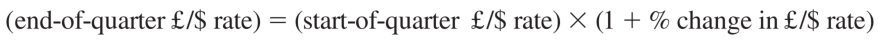

Analogously, the equations computing the end-of-quarter exchange rates between New  Zealand dollars (NZD) per U.S. dollar and Japanese yen (¥) per U.S. dollar are:

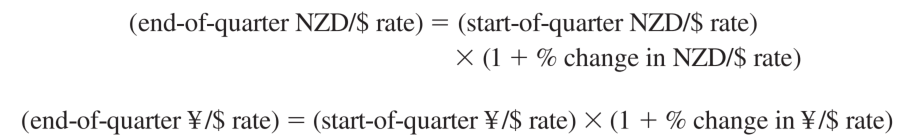

### The Uncertain Factor
The percent change in the exchange rate between pairs of currencies from the start to the end of a quarter is uncertain. Therefore, PTW would like to use random variables to model the percent change in the £ per \\$ rate, the percent change in the NZD per \\$ rate, and the percent change in the ¥ per \\$ rate.

However, PTW realizes that there are dependencies between the exchange rate flctuations. For example, if the U.S. dollar weakens against the pound sterling, it may be more likely to also weaken against the New Zealand dollar. 

<blockquote>
these values should be generated jointly (as a related collection of values).
</blockquote>

## Sampling
PTW constructed a data set on the joint percent changes between the three exchange rates for 2,000 quarter-scenarios. These data are based on historical observations as well as scenarios based on expert judgment.

After analyzing the historical data, our Analysts infromed us that that the percent changes in exchange rates are correlated. That is, Positive percentage fluctuations of £ per \\$ often occur with positive percentage fluctuations of NZD per \\$ while negative fluctuations of £ per \\$ often occur with negative fluctuations of NZD per \\$. They concluded that
- The **fluctuations of £ per \\$ and NZD per \\$ are not independent, but are correlated.**

Similarly,
- **Percent changes in £ per \\$ appear to be correlated with percent changes in ¥ per \\$.**
- Also, **percent changes in NZD per $ appear to be correlated with percent changes in ¥ per \\$.**

#### Stragey: Sample Related Values from Historical Data


# Simulation Considerations

**Verification** is the process of determining that the computer procedure that performs the simulation calculations is logically correct. Verification is largely a debugging task to make sure that there are no errors in the computer procedure that implements the simulation.

The verification step is not complete until the user develops a high degree of confidence that the computer procedure is error free.

**Validation** is the process of ensuring that the simulation model provides an accurate representation of a real system. Validation requires an agreement among analysts and managers that the logic and the assumptions used in the design of the simulation model accurately reflect how the real system operates.

# Advantages and Disadvantages of Using Simulation
#### Advantages
- The primary advantages of simulation are that it is conceptually easy to understand and that the methods can be used to model and learn about the behavior of complex systems that would be difficult, if not impossible, to deal with analytically.
- A simulation model provides a convenient experimental laboratory for the real system. Changing assumptions or operating policies in the simulation model and rerunning it can provide results that help predict how such changes will affect the operation of the real system. 

#### Disadvantages
- For complex systems, the process of developing, verifying, and validating a simulation model can be time consuming and expensive.
- The Data Scientist must be conscious of the assumptions of the model in order to understand its limitations.
- Each simulation run provides only a sample of output data. The summary of the simulation data provides only estimates or approximations about the real system